# Fragestellung

Werden die Formulierungen der Tagesschau Nachrichten, die während der EM laufen, in leichterer Sprache formuliert?

Außerdem ist die grundsätzliche Änderung sprachlichen Niveaus interessant.

# Methode

Zur Beantwortung der Frage werden zunächst Youtubevideos der letzten Monate gescraped und anschließend mittels Lesbarkeitsmessungen ála Flesch automatisiert gelabelled. 



Siehe:

Karl-Heinz Best: Sind Wort- und Satzlänge brauchbare Kriterien der Lesbarkeit von Texten? In: Sigurd Wichter, Albert Busch (Hrsg.): Wissenstransfer: Erfolgskontrolle und Rückmeldungen aus der Praxis. P. Lang, Frankfurt am Main 2006, ISBN 978-3-631-53671-1, S. 21–31. 


# Analyse


In [1]:
pip install pandas matplotlib textstat scipy seaborn

  Using cached matplotlib-3.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached textstat-0.7.3-py3-none-any.whl.metadata (14 kB)
  Using cached scipy-1.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.4 kB)
  Using cached pillow-10.3.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached pyphen-0.15.0-py3-none-any.whl.metadata (3.3 kB)
Using cached matplotlib-3.9.0-cp310-cp310-manylinux_2_

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import textstat 
from scipy import stats
import seaborn as sns
import re

In [12]:
df = pd.read_csv('data/data.csv')

if 'ID' not in df.columns:
    df['ID'] = range(1, len(df) + 1)

df.head()

,ID,url,path,text,title,date
0,1,https://www.youtube.com/watch?v=pWuYkzRypf8,audio/1_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 25.06.2024",2024-06-25
1,2,https://www.youtube.com/watch?v=MAmyhxJoZFM,audio/2_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 24.06.2024",2024-06-24
2,3,https://www.youtube.com/watch?v=AVqitc2vJ0c,audio/3_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 23.06.2024",2024-06-23
3,4,https://www.youtube.com/watch?v=Nmwe8gXfu1c,audio/4_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 22.06.2024",2024-06-22
4,5,https://www.youtube.com/watch?v=-okNLhbCcHc,audio/5_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 20.06.2024",2024-06-20


In [13]:
def extract_date(title):
    date_pattern = re.compile(r'\b\d{1,2}\.\d{1,2}\.\d{2,4}\b')
    match = date_pattern.search(title)
    return match.group(0) if match else None
    
def convert_date(date_str):
    for fmt in ('%d.%m.%Y', '%d.%m.%y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return None

df['date'] = df['title'].apply(extract_date)
df['date'] = df['date'].apply(convert_date)

df.head()

,ID,url,path,text,title,date
0,1,https://www.youtube.com/watch?v=pWuYkzRypf8,audio/1_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 25.06.2024",2024-06-25
1,2,https://www.youtube.com/watch?v=MAmyhxJoZFM,audio/2_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 24.06.2024",2024-06-24
2,3,https://www.youtube.com/watch?v=AVqitc2vJ0c,audio/3_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 23.06.2024",2024-06-23
3,4,https://www.youtube.com/watch?v=Nmwe8gXfu1c,audio/4_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 22.06.2024",2024-06-22
4,5,https://www.youtube.com/watch?v=-okNLhbCcHc,audio/5_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 20.06.2024",2024-06-20


In [16]:
textstat.set_lang("de")
df['flesch'] = df.apply(lambda row: textstat.flesch_reading_ease(row['text']), axis=1)
df.head()

,ID,url,path,text,title,date,flesch
0,1,https://www.youtube.com/watch?v=pWuYkzRypf8,audio/1_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 25.06.2024",2024-06-25,57.65
1,2,https://www.youtube.com/watch?v=MAmyhxJoZFM,audio/2_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 24.06.2024",2024-06-24,56.85
2,3,https://www.youtube.com/watch?v=AVqitc2vJ0c,audio/3_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 23.06.2024",2024-06-23,64.60
3,4,https://www.youtube.com/watch?v=Nmwe8gXfu1c,audio/4_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 22.06.2024",2024-06-22,63.00
4,5,https://www.youtube.com/watch?v=-okNLhbCcHc,audio/5_tagesschau.mp3,Hier ist das erste deutsche Fernsehen mit der...,"tagesschau 20:00 Uhr, 20.06.2024",2024-06-20,57.25


Die EM startete am 14. Juni.

| Score  | Difficulty        |
|--------|-------------------|
| 90-100 |  Very Easy        |
| 80-89  | 	Easy             |
| 70-79  | 	Fairly Easy      |
| 60-69  | 	Standard         |
| 50-59  | 	Fairly Difficult |
| 30-49  | 	Difficult        |
| 0-29   | 	Very Confusing   |

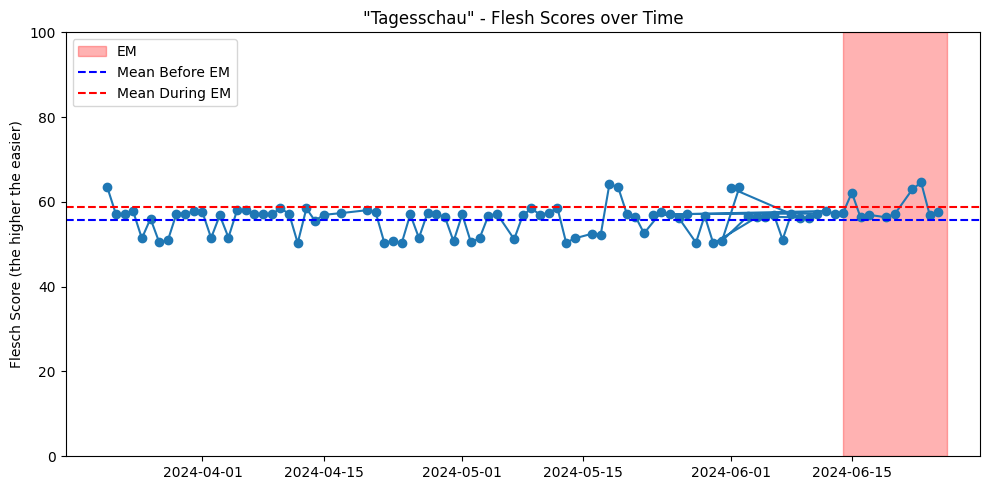

In [20]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

mean_before_em = df[df['date'] < pd.to_datetime("2024-06-14")]['flesch'].mean()
mean_during_em = df[(df['date'] >= pd.to_datetime("2024-06-14")) & (df['date'] <= pd.to_datetime(max(df['date'])))]['flesch'].mean()


plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['flesch'], marker='o')
plt.axvspan(pd.to_datetime("2024-06-14"), pd.to_datetime("2024-06-26"), color='red', alpha=0.3, label='EM')
plt.axhline(y=mean_before_em, color='blue', linestyle='--', label='Mean Before EM')
plt.axhline(y=mean_during_em, color='red', linestyle='--', label='Mean During EM')
plt.ylabel('Flesch Score (the higher the easier)')
plt.title('"Tagesschau" - Flesh Scores over Time')
plt.grid(False)
plt.ylim(0, 100)
plt.tight_layout()
plt.legend()

plt.show()

## T-Test

In [21]:
before_em = df[df['date'] < pd.to_datetime("2024-06-14")]['flesch']
during_em = df[(df['date'] >= pd.to_datetime("2024-06-14")) & (df['date'] <= pd.to_datetime(max(df['date'])))]['flesch']

t_stat, p_value = stats.ttest_ind(before_em, during_em)

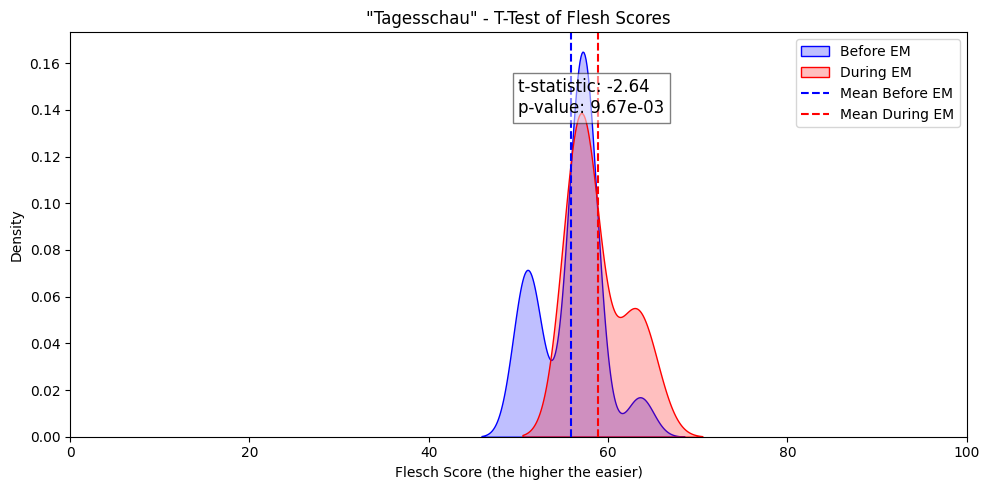

In [22]:
plt.figure(figsize=(10, 5))
sns.kdeplot(before_em, label='Before EM', color='blue', fill=True)
sns.kdeplot(during_em, label='During EM', color='red', fill=True)
plt.axvline(before_em.mean(), color='blue', linestyle='--', label='Mean Before EM')
plt.axvline(during_em.mean(), color='red', linestyle='--', label='Mean During EM')

plt.annotate(f't-statistic: {t_stat:.2f}\np-value: {p_value:.2e}', 
             xy=(0.5, 0.8), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.5))
plt.xlim(0, 100)

plt.xlabel('Flesch Score (the higher the easier)')
plt.ylabel('Density')
plt.title('"Tagesschau" - T-Test of Flesh Scores')
plt.grid(False)

plt.legend()
plt.tight_layout()

plt.show()